In [11]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import spacy
import wordcloud
import os 
import sys
pd.options.mode.chained_assignment = None 

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
nltk.download('wordnet')
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
!python -m spacy download en_core_web_md
import en_core_web_md
text_to_nlp = en_core_web_md.load()

import pickle

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.4.0/en_core_web_md-3.4.0-py3-none-any.whl (42.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2022-08-15 20:20:51.678474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-15 20:20:51.678751: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-15 20:20:54.056807: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-15 20:20:54.057417: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-08-15 20:20:54.058005: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-08-15 20:20:54.058604: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [12]:
data_file  = '../yelp_final.csv'

In [13]:
# read our data in using 'pd.read_csv('file')'
yelp_full = pd.read_csv(data_file)
yelp_full.head()

,business_id,stars,text,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,_1QQZuf4zZOyFCvXc0o6Vg,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0
3,6ozycU1RpktNG2-1BroVtw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
4,zp713qNhx8d9KCJJnrw1xA,5,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [16]:
needed_columns = ['stars', 'text'] 
yelp = yelp_full[needed_columns]
yelp.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
3,5,General Manager Scott Petello is a good egg!!!...
4,5,Drop what you're doing and drive here. After I...


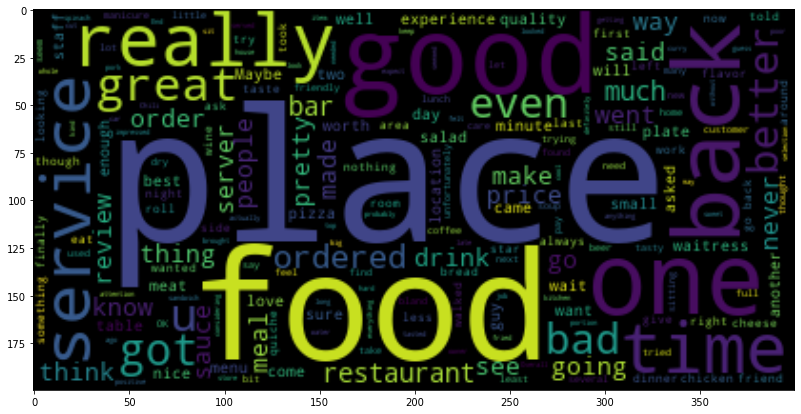

In [17]:
num_stars =  2
this_star_text = ''
for t in yelp[yelp['stars'] == num_stars]['text'].values: # form field cell
    this_star_text += t + ' '
    
wordcloud = WordCloud()    
wordcloud.generate_from_text(this_star_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')

In [18]:
def is_good_review(num_stars):
    if num_stars>3: ### YOUR CODE HERE
        return True
    else:
        return False

yelp['is_good_review'] = yelp['stars'].apply(is_good_review)
yelp.head()

,stars,text,is_good_review
0,5,My wife took me here on my birthday for breakf...,True
1,5,I have no idea why some people give bad review...,True
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",True
3,5,General Manager Scott Petello is a good egg!!!...,True
4,5,Drop what you're doing and drive here. After I...,True


In [19]:
example_text = "All the people I spoke to were super nice and very welcoming." #@param {type:"string"}
tokens = word_tokenize(example_text)
tokens

['All',
 'the',
 'people',
 'I',
 'spoke',
 'to',
 'were',
 'super',
 'nice',
 'and',
 'very',
 'welcoming',
 '.']

In [20]:
example_word = "are" 
if example_word.lower() in STOP_WORDS:
  print ('"' + example_word + '" is a stop word.')
else:
  print ('"' + example_word + '" is NOT a stop word.')

"are" is a stop word.


In [21]:
X_text = yelp['text']
y = yelp['is_good_review']

In [22]:
def tokenize(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct):  
            clean_tokens.append(token.lemma_)
    return clean_tokens

In [23]:
bow_transformer = CountVectorizer(analyzer=tokenize, max_features=800).fit(X_text)

In [24]:
bow_transformer.vocabulary_

{'wife': 781,
 'take': 701,
 'birthday': 103,
 'breakfast': 120,
 'excellent': 266,
 ' ': 2,
 'perfect': 526,
 'sit': 644,
 'outside': 508,
 'waitress': 763,
 'food': 305,
 'arrive': 70,
 'quickly': 569,
 'busy': 131,
 'Saturday': 45,
 'morning': 470,
 'look': 425,
 'like': 413,
 'place': 536,
 'fill': 293,
 'pretty': 555,
 'early': 249,
 'well': 778,
 '\n\n': 1,
 'simply': 642,
 'good': 330,
 'sure': 695,
 'use': 745,
 'ingredient': 385,
 'fresh': 311,
 'order': 505,
 'amazing': 65,
 'menu': 457,
 'white': 779,
 'egg': 253,
 'vegetable': 752,
 'tasty': 704,
 'delicious': 225,
 'come': 176,
 '2': 14,
 'piece': 534,
 'bread': 118,
 'absolutely': 56,
 'meal': 450,
 'toast': 719,
 'wait': 761,
 'idea': 379,
 'people': 524,
 'bad': 85,
 'review': 594,
 'go': 329,
 'probably': 559,
 'case': 142,
 'friend': 313,
 'pm': 544,
 'past': 519,
 'Sunday': 48,
 'think': 713,
 'evening': 263,
 'seat': 617,
 'say': 612,
 'girl': 325,
 'waiter': 762,
 'get': 323,
 'drink': 245,
 'pleasant': 540,
 'serv

In [25]:
len(bow_transformer.vocabulary_)

800

In [26]:
X = bow_transformer.transform(X_text)

In [27]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0,3,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,11,0,0,0,0,0,1,0,0,...,2,0,1,1,0,1,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [29]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test) 
print (accuracy)

0.765


In [31]:
pickle.dump(logistic_model, open('logreg.pkl', 'wb'))
pickle.dump(bow_transformer, open('bowTransformer.pkl', 'wb'))

In [32]:
import pickle

In [33]:
logregModel = pickle.load(open('../logreg.pkl', 'rb'))
bowTransformer = pickle.load(open('../bowTransformer.pkl', 'rb'))

In [34]:
def predict():
  example_review = "Nilay's restaurant had bad shit"
  prediction = logregModel.predict(bowTransformer.transform([example_review]))

  if prediction:
    print ("This was a POSITIVE review!")
  else:
    print ("This was a NEGATIVE review!")

In [35]:
predict()

This was a NEGATIVE review!
